In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('Churn_Modelling.csv')

In [2]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [2]:
df=data.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [6]:
data.shape

(10000, 11)

NameError: name 'df' is not defined

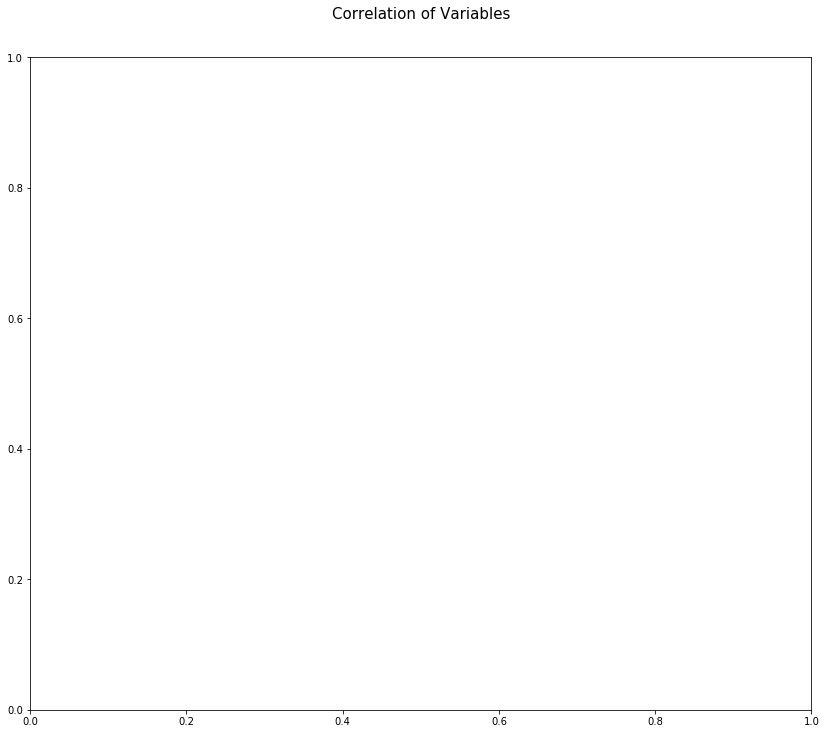

In [3]:
drop_elements = ['Geography', 'Gender']
new_df = data.drop(drop_elements, axis = 1)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Variables', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [4]:
x=len(data[data.Exited == 1].Exited)
y=len(data[data.Exited == 0].Exited)
print(x)
print(y)
ratio = x/y
print(ratio)

2037
7963
0.25580811252040686


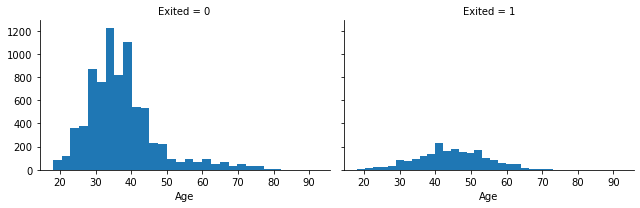

In [91]:
g = sns.FacetGrid(df, col='Exited',aspect = 1.5)
g.map(plt.hist, 'Age', bins=30)

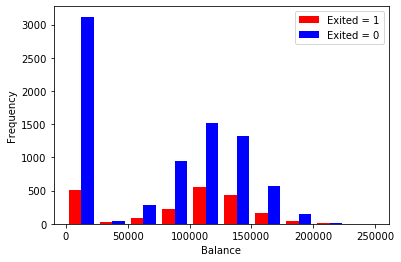

In [96]:
Balance_yes = df[df.Exited== 1].Balance
Balance_no = df[df.Exited== 0].Balance

plt.hist([Balance_yes, Balance_no], color = ['red', 'blue'], label = ['Exited = 1', 'Exited = 0'] )
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

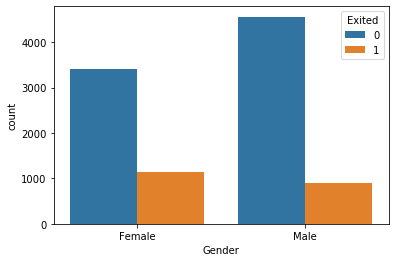

In [100]:
sns.countplot(x = 'Gender',hue = 'Exited', data = df)

In [3]:
df = df.drop(['Geography', 'Gender'], axis=1)
Geography = pd.get_dummies(data.Geography).iloc[:,1:]
Gender = pd.get_dummies(data.Gender).iloc[:,1:]
df = pd.concat([df,Geography,Gender], axis=1)

In [4]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)  
forest.fit(X_train, y_train)  
predictions = forest.predict(X_test)

Random forest ROC AUC=0.869
Adaboosting ROC AUC=0.853
Stacking ROC AUC=0.857
Logistic regression ROC AUC=0.772
Decision tree ROC AUC=0.724


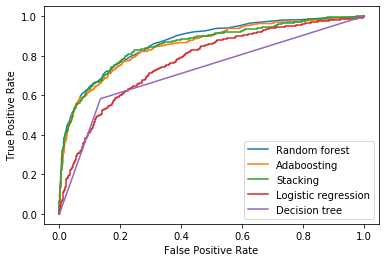

In [40]:
proba = forest.predict_proba(X_test)[:,1]
proba1 = ada.predict_proba(X_test)[:,1]
proba2 = stack.predict_proba(X_test)[:,1]
proba3 = reg.predict_proba(X_test)[:,1]
proba4 = tree.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, proba)
auc1 = roc_auc_score(y_test, proba1)
auc2 = roc_auc_score(y_test, proba2)
auc3 = roc_auc_score(y_test, proba3)
auc4 = roc_auc_score(y_test, proba4)

print('Random forest ROC AUC=%.3f' % (auc))
print('Adaboosting ROC AUC=%.3f' % (auc1))
print('Stacking ROC AUC=%.3f' % (auc2))
print('Logistic regression ROC AUC=%.3f' % (auc3))
print('Decision tree ROC AUC=%.3f' % (auc4))

fpr, tpr, thresh = roc_curve(y_test, proba, pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(y_test, proba1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, proba2, pos_label=1)
fpr3, tpr3, thresh3= roc_curve(y_test, proba3, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, proba4, pos_label=1)


plt.plot(fpr, tpr, linestyle='-', label='Random forest')
plt.plot(fpr1, tpr1, linestyle='-', label='Adaboosting')
plt.plot(fpr2, tpr2, linestyle='-', label='Stacking')
plt.plot(fpr3, tpr3, linestyle='-', label='Logistic regression')
plt.plot(fpr4, tpr4, linestyle='-', label='Decision tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.867


In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv_scores = cross_val_score(forest, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print(cv_scores)
print('Accuracy: %.3f (%.3f)' % (mean(cv_scores), std(cv_scores)))

[0.87125 0.85125 0.86875 0.8725  0.85    0.8525  0.865   0.84125 0.85625
 0.8675 ]
Accuracy: 0.860 (0.010)


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predictions)

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model testing accuracy = {}'.format( (TP+TN) / (TP+TN+FN+FP)))

[[1523   72]
 [ 194  211]]
Model testing accuracy = 0.867


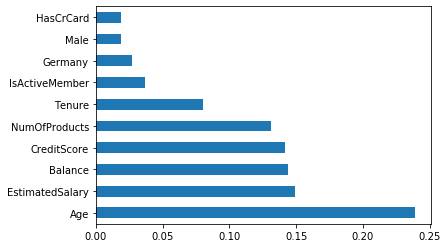

In [48]:
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [37]:
forest.score(X_train,y_train)

0.999875

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
predictions1 = ada.predict(X_test)

print(classification_report(y_test,predictions1 ))  
print(accuracy_score(y_test, predictions1 ))

cv_scores1 = cross_val_score(ada, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print(cv_scores1)
print('Accuracy: %.3f (%.3f)' % (mean(cv_scores1), std(cv_scores1)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.56      0.63       405

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.867
[0.86625 0.84875 0.87875 0.845   0.82875 0.84    0.87    0.85125 0.84375
 0.85375]
Accuracy: 0.853 (0.014)


In [17]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=0).fit(X_train, y_train)
prediction2 = reg.predict(X_test)

print(classification_report(y_test,prediction2 ))  
print(accuracy_score(y_test, prediction2 ))

cv_scores2 = cross_val_score(reg, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print(cv_scores2)
print('Accuracy: %.3f (%.3f)' % (mean(cv_scores2), std(cv_scores2)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811
[0.81    0.80375 0.80875 0.80875 0.82125 0.805   0.82125 0.79625 0.79375
 0.815  ]
Accuracy: 0.808 (0.009)


In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
prediction3 = tree.predict(X_test)

print(classification_report(y_test,prediction3 ))  
print(accuracy_score(y_test, prediction3 ))

cv_scores3 = cross_val_score(tree, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print(cv_scores3)
print('Accuracy: %.3f (%.3f)' % (mean(cv_scores3), std(cv_scores3)))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1595
           1       0.52      0.58      0.55       405

    accuracy                           0.81      2000
   macro avg       0.71      0.72      0.71      2000
weighted avg       0.82      0.81      0.81      2000

0.808
[0.78625 0.78    0.8025  0.79625 0.78875 0.75875 0.80375 0.785   0.7625
 0.81   ]
Accuracy: 0.787 (0.016)


In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

learners = [
    ('tree', DecisionTreeClassifier(random_state=0)),
    ('SVM', SVC(random_state=0)),
    ('bayes',GaussianNB())
]

stack = StackingClassifier(estimators=learners, final_estimator=LogisticRegression(random_state=0))
stack.fit(X_train, y_train)
prediction4 = stack.predict(X_test)

print(classification_report(y_test,prediction4 ))  
print(accuracy_score(y_test, prediction4 ))

cv_scores4 = cross_val_score(stack, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print(cv_scores4)
print('Accuracy: %.3f (%.3f)' % (mean(cv_scores4), std(cv_scores4)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

0.863
[0.87    0.85    0.8725  0.85625 0.8525  0.845   0.86    0.84625 0.84
 0.865  ]
Accuracy: 0.856 (0.010)


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

